Loaded data from 'avg-Anchor2-H0-1.csv'. Found 21 data points.
Generating heatmaps... (ปิดหน้าต่าง plot เพื่อดูกราฟถัดไป)


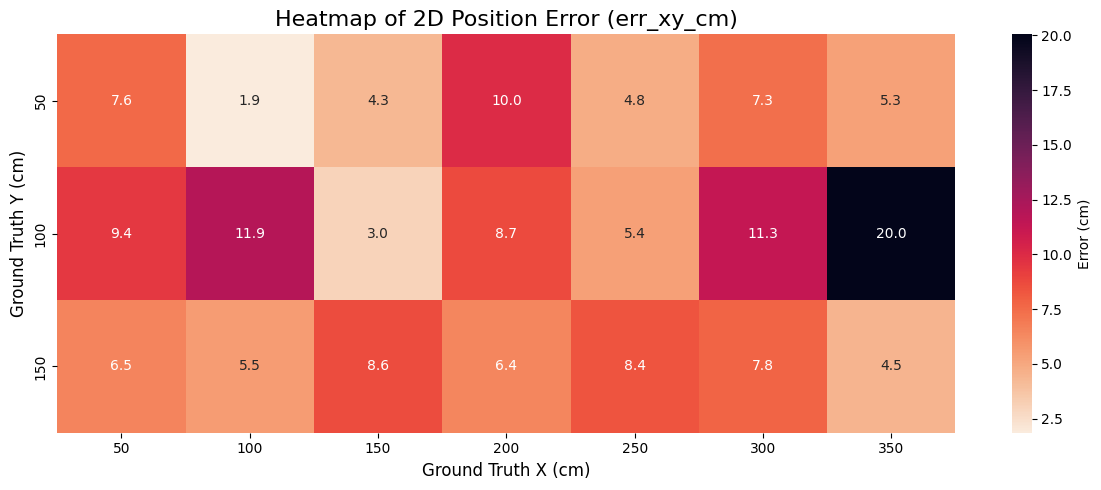

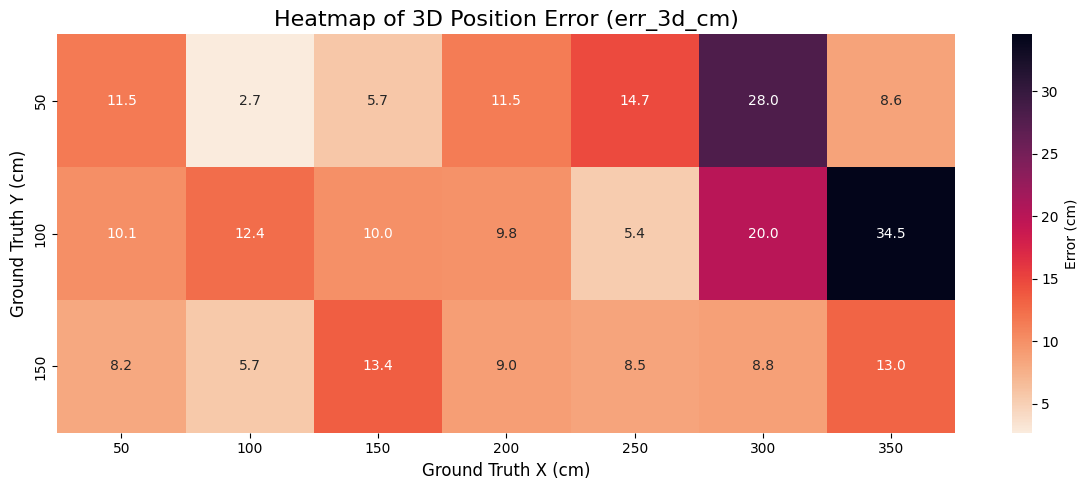

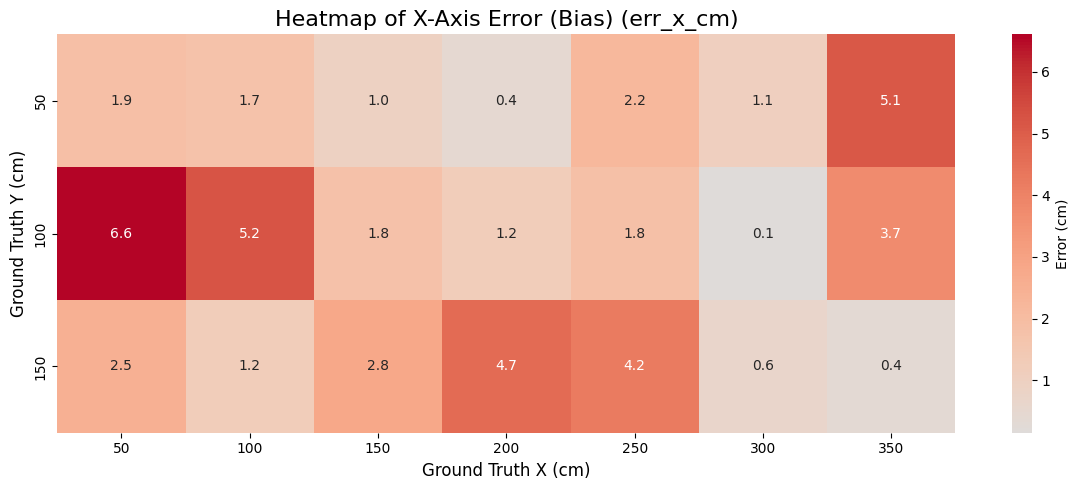

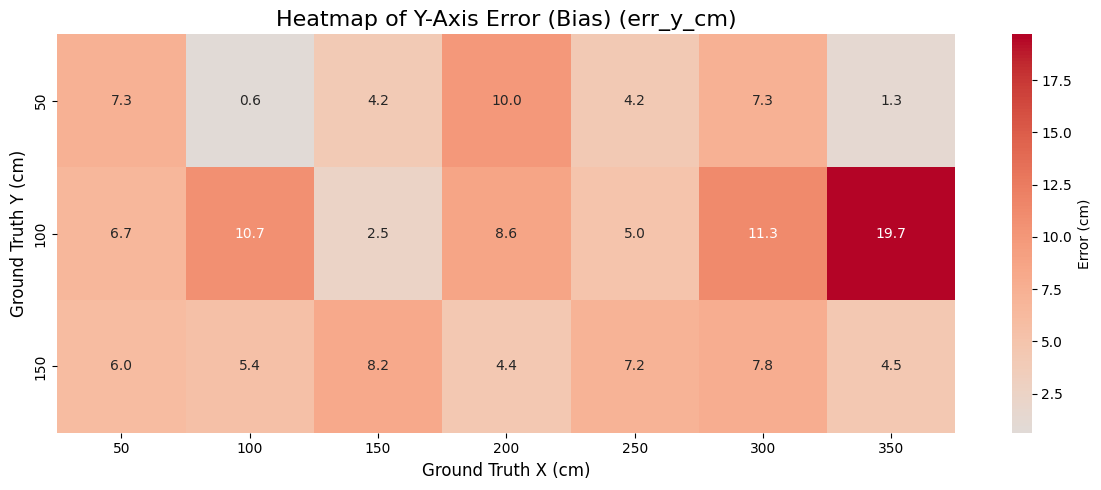

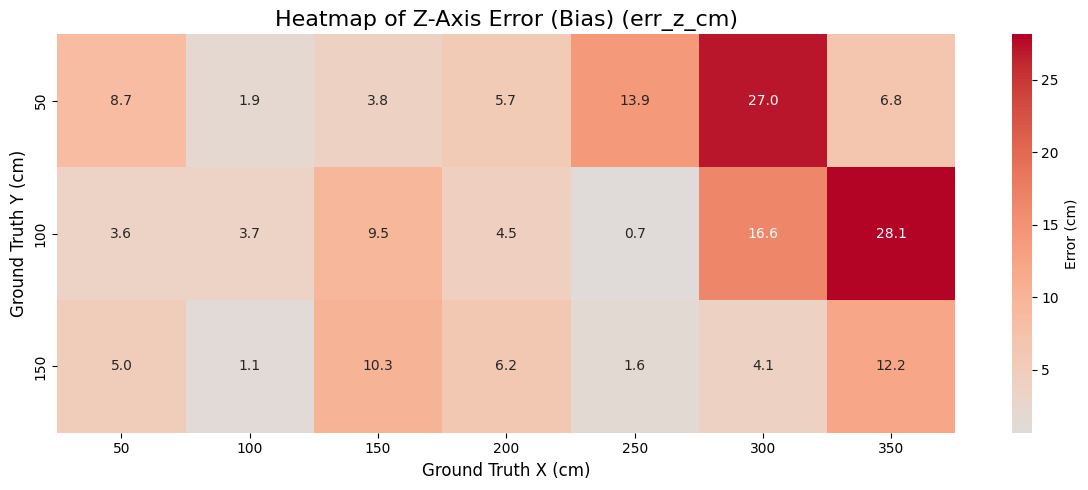

All plots generated.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

# --- Config ---
# ชื่อไฟล์ CSV ที่ถูกสร้างโดย 'uwb_server.py'
CSV_FILENAME = "avg-Anchor2-H0-1.csv" 
# --- End Config ---

def plot_heatmap(data_pivot, title, unit='cm', cmap="viridis", center=None, fmt=".1f"):
    """
    Helper function สำหรับพล็อต Heatmap 1 รูป
    """
    plt.figure(figsize=(12, 5)) # ขนาด (กว้าง x สูง)
    
    # center=0.0 ใช้สำหรับ plot แบบ diverging (เช่น err_x)
    # cmap="rocket_r" (r คือ reversed) เหมาะสำหรับ error magnitude (ค่าน้อย=ดี)
    # cmap="coolwarm" เหมาะสำหรับ error bias (ค่าบวก/ลบ)
    
    ax = sns.heatmap(
        data_pivot, 
        annot=True,     # แสดงตัวเลขในช่อง
        fmt=fmt,        # รูปแบบทศนิยม 1 ตำแหน่ง
        cmap=cmap,      # ชุดสี
        center=center,  # จุดกึ่งกลางของสี (สำหรับ coolwarm)
        cbar_kws={'label': f'Error ({unit})'} # ป้ายกำกับของแถบสี
    )
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Ground Truth X (cm)", fontsize=12)
    ax.set_ylabel("Ground Truth Y (cm)", fontsize=12)
    
    # กลับด้านแกน Y เพื่อให้ (0.5, 0.5) อยู่ที่มุมซ้ายบนเหมือนแผนที่
    # ax.invert_yaxis() # Seaborn มักจะทำให้อยู่แล้ว
    
    plt.tight_layout()
    plt.show()

def main():
    """
    ฟังก์ชันหลัก: โหลดข้อมูล, สร้าง pivot tables, และพล็อต
    """
    
    # 1. ตรวจสอบและโหลดข้อมูล
    if not os.path.exists(CSV_FILENAME):
        print(f"Error: ไม่พบไฟล์ '{CSV_FILENAME}'")
        print("โปรดรันสคริปต์ 'uwb_server.py' เพื่อเก็บข้อมูลก่อน")
        sys.exit(1)
        
    try:
        df = pd.read_csv(CSV_FILENAME)
        if df.empty:
            print(f"Error: ไฟล์ '{CSV_FILENAME}' ว่างเปล่า")
            sys.exit(1)
    except Exception as e:
        print(f"Error: ไม่สามารถอ่านไฟล์ CSV: {e}")
        sys.exit(1)

    print(f"Loaded data from '{CSV_FILENAME}'. Found {len(df)} data points.")
    print("Generating heatmaps... (ปิดหน้าต่าง plot เพื่อดูกราฟถัดไป)")

    # 2. พล็อต Heatmap 1: 2D Error (err_xy_cm)
    # นี่คือ "Heatmap ความคลาดเคลื่อน 2 มิติ" (X และ Y รวมกัน)
    try:
        pivot_xy = df.pivot(index='gt_y_cm', columns='gt_x_cm', values='err_xy_cm')
        plot_heatmap(
            pivot_xy, 
            title="Heatmap of 2D Position Error (err_xy_cm)", 
            cmap="rocket_r" # Magnitude (ค่าน้อย=ดี, ค่ามาก=แย่)
        )
    except Exception as e:
        print(f"Could not plot 'err_xy_cm': {e}")

    # 3. พล็อต Heatmap 2: 3D Error (err_3d_cm)
    # นี่คือ "Heatmap ความคลาดเคลื่อน 3 มิติ" (X, Y, และ Z รวมกัน) ที่คุณถามถึง
    try:
        pivot_3d = df.pivot(index='gt_y_cm', columns='gt_x_cm', values='err_3d_cm')
        plot_heatmap(
            pivot_3d, 
            title="Heatmap of 3D Position Error (err_3d_cm)", 
            cmap="rocket_r" # Magnitude (ค่าน้อย=ดี, ค่ามาก=แย่)
        )
    except Exception as e:
        print(f"Could not plot 'err_3d_cm': {e}")

    # 4. พล็อต Heatmap 3: X-Axis Error (err_x_cm)
    # นี่คือ "Heatmap ความคลาดเคลื่อนเฉพาะแกน X" (ดูว่าเพี้ยนไปทางซ้าย/ขวา)
    try:
        pivot_x = df.pivot(index='gt_y_cm', columns='gt_x_cm', values='err_x_cm')
        plot_heatmap(
            pivot_x, 
            title="Heatmap of X-Axis Error (Bias) (err_x_cm)", 
            cmap="coolwarm", # Diverging (สีฟ้า=ลบ, สีแดง=บวก)
            center=0.0      # ให้ 0 เป็นสีกลาง (สีขาว)
        )
    except Exception as e:
        print(f"Could not plot 'err_x_cm': {e}")

    # 5. พล็อต Heatmap 4: Y-Axis Error (err_y_cm)
    # นี่คือ "Heatmap ความคลาดเคลื่อนเฉพาะแกน Y" (ดูว่าเพี้ยนไปทางหน้า/หลัง)
    try:
        pivot_y = df.pivot(index='gt_y_cm', columns='gt_x_cm', values='err_y_cm')
        plot_heatmap(
            pivot_y, 
            title="Heatmap of Y-Axis Error (Bias) (err_y_cm)", 
            cmap="coolwarm", # Diverging
            center=0.0
        )
    except Exception as e:
        print(f"Could not plot 'err_y_cm': {e}")

    # 6. พล็อต Heatmap 5: Z-Axis Error (err_z_cm)
    # นี่คือ "Heatmap ความคลาดเคลื่อนเฉพาะแกน Z" (ดูว่าเพี้ยนไปทางสูง/ต่ำ)
    try:
        pivot_z = df.pivot(index='gt_y_cm', columns='gt_x_cm', values='err_z_cm')
        plot_heatmap(
            pivot_z, 
            title="Heatmap of Z-Axis Error (Bias) (err_z_cm)", 
            cmap="coolwarm", # Diverging
            center=0.0
        )
    except Exception as e:
        print(f"Could not plot 'err_z_cm': {e}")
        
    print("All plots generated.")

if __name__ == "__main__":
    main()